In [2]:
import numpy as np
import pandas as pd
import re
import preprocessing as pu
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [3]:
df=pd.read_csv('dataset/train.csv',parse_dates=True)
pd.set_option('display.max_columns', None)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [6]:
df['Date_of_creation']=pd.to_datetime(df['Date_of_creation'].values,format='%Y-%m-%d')

<AxesSubplot:>

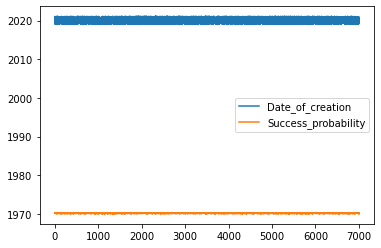

In [7]:
df[['Date_of_creation','Success_probability']].plot.line()

In [8]:
a=pd.DataFrame(df['Success_probability'].values,index=df['Date_of_creation'],columns=['Success_proabability'])

In [9]:
a.head()

,Success_proabability
Date_of_creation,
2020-03-29,73.6
2019-07-10,58.9
2019-07-27,68.8
2021-01-30,64.5
2019-05-22,62.4


In [10]:
a.head()

,Success_proabability
Date_of_creation,
2020-03-29,73.6
2019-07-10,58.9
2019-07-27,68.8
2021-01-30,64.5
2019-05-22,62.4


In [11]:
monthly=a.resample(rule='M').mean()

Text(0, 0.5, 'Success_Probability')

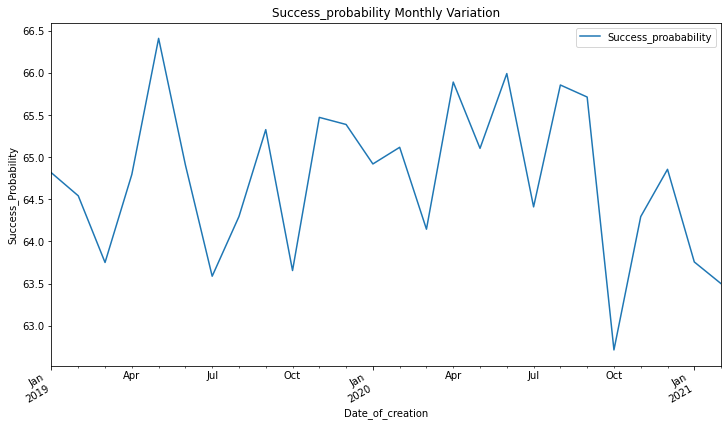

In [12]:
monthly.plot.line(subplots=True,figsize=(12,7))
plt.title('Success_probability Monthly Variation')
plt.ylabel('Success_Probability')

In [13]:
weekly=a.resample(rule='W').mean()

Text(0, 0.5, 'Success_Probability')

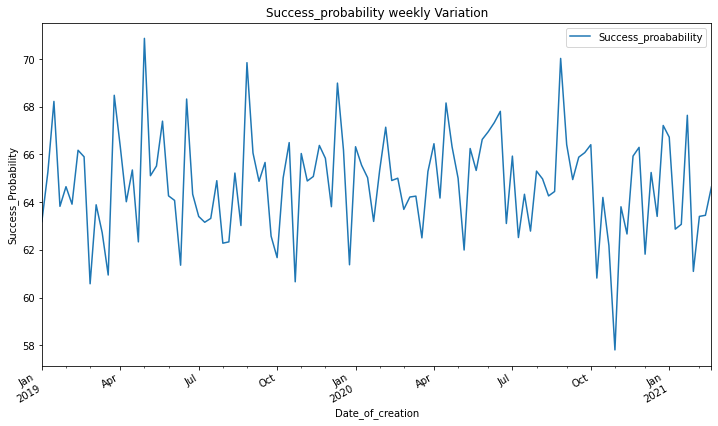

In [14]:
weekly.plot.line(subplots=True,figsize=(12,7))
plt.title('Success_probability weekly Variation')
plt.ylabel('Success_Probability')

In [15]:
yearly=a.resample(rule='A').mean()

Text(0, 0.5, 'Success_Probability')

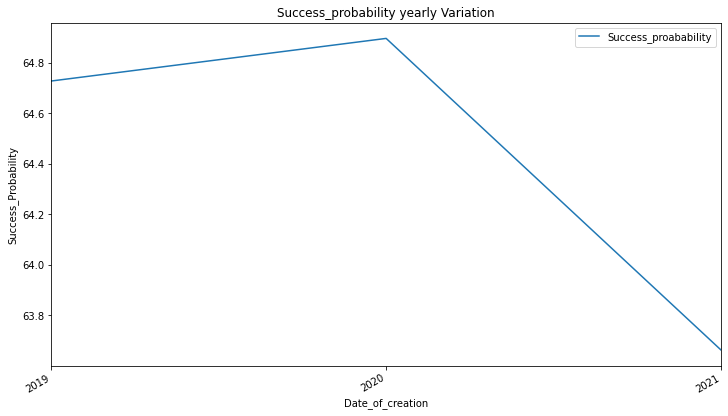

In [16]:
yearly.plot.line(subplots=True,figsize=(12,7))
plt.title('Success_probability yearly Variation')
plt.ylabel('Success_Probability')

In [17]:
Bussiness_monthend=a.resample(rule='BM').mean()

Text(0, 0.5, 'Success_Probability')

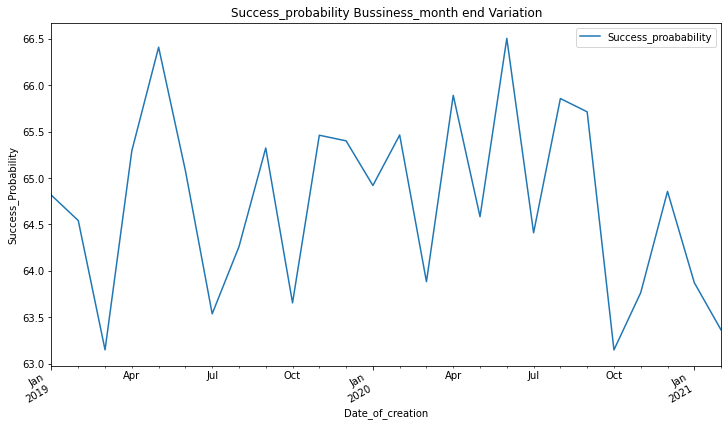

In [18]:
Bussiness_monthend.plot.line(subplots=True,figsize=(12,7))
plt.title('Success_probability Bussiness_month end Variation')
plt.ylabel('Success_Probability')

#### I am going to use month as a feature column

In [19]:
df['month']=pd.DatetimeIndex(df['Date_of_creation']).month
df['year']=pd.DatetimeIndex(df['Date_of_creation']).year
df['week']=pd.DatetimeIndex(df['Date_of_creation']).week

In [20]:
df.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,month,year,week
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6,3,2020,13
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9,7,2019,28
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8,7,2019,30
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5,1,2021,4
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4,5,2019,21


## Checking Null Values

In [21]:
df.isnull().any()

Deal_title               False
Lead_name                False
Industry                  True
Deal_value                True
Weighted_amount           True
Date_of_creation         False
Pitch                    False
Contact_no               False
Lead_revenue             False
Fund_category            False
Geography                 True
Location                  True
POC_name                  True
Designation              False
Lead_POC_email           False
Hiring_candidate_role    False
Lead_source              False
Level_of_meeting         False
Last_lead_update          True
Internal_POC             False
Resource                  True
Internal_rating          False
Success_probability      False
month                    False
year                     False
week                     False
dtype: bool

## Checking Categorical features

In [22]:
for col in df.dtypes[df.dtypes == object].index:
    print('Unique items in column',col,'with count {} are {}:'.format(df[col].nunique(),df[col].unique()))
    print('-'*90)

Unique items in column Deal_title with count 7007 are ['TitleM5DZY' 'TitleKIW18' 'TitleFXSDN' ... 'TitleF1FWY' 'TitleXVBNJ'
 'TitleKXU3H']:
------------------------------------------------------------------------------------------
Unique items in column Lead_name with count 7007 are ['Davis, Perkins and Bishop Inc' 'Bender PLC LLC' 'Carter-Henry and Sons'
 ... 'Romero-Juarez PLC' 'Sullivan, Mooney and Elliott LLC'
 'Jones LLC and Sons']:
------------------------------------------------------------------------------------------
Unique items in column Industry with count 171 are ['Restaurants' 'Construction Services' 'Hospitals/Clinics' 'Real Estate'
 'Financial Services' 'Banks' 'Architecture/Engineering'
 'Education/Training' 'REIT' 'Healthcare Facilities/Services'
 'Hotels/Motels' 'Biotech/Healthcare' 'Services' 'Other Investment Firms'
 'Software' 'Other Biz Services' 'Materials/Manufacturing' 'Other'
 'Trucking' 'Automotive/Transportation' 'Constr - Supplies'
 'Casinos/Gaming' 'Food

In [23]:
for unique in df['POC_name'].unique():
    print(unique)

Charlene Werner
rakhi
Ariel Hamilton
Erin Wilson
kavita
kamla devi
Sara Dixon
Christian Stanley
Joseph Thompson
William Grimes
Tamara Sanchez
Frank Jones
Frank Ali
saaniya
rekha bai
Keith Patterson
Joshua Wright
Christopher Walter
manju
kiran devi
Sarah Woods
pinki
kirti
rani
George Francis
khusbu
ritu
Jennifer Davis
naina
santro
Candice Mcintyre
aarti
preeti bharti
Alex Le
komal
Anthony Armstrong
Tami Frost
Michelle Adams
Luis Young
Christopher Robles
William Kramer
smt dhapu
Mark Brown
kimmi@neelam
Patrick Simmons
Jennifer Hart
Jose Martin
Amy Stuart
Christopher Greer
Philip Richards
puja chauhan
pooja
Michael Lopez
usha
sona
anju devi
Jacob Montgomery
vinita
sonyi
Dr. Bryan Vargas
arpna pathak
preety
amreen
kushum
Melissa Meyer
Chris Casey
Cynthia Jones
Courtney Jackson
sitara
ramkali
uma
manisha
Mark Anderson
heena
Andrea Robertson
Scott Medina
vimala
vineeta
sakshi
William Rich
mamta
vijaya devi
Jessica Pitts
Amy Roy
lalita choudhry
Jeffrey Gray
sahawaj
riya masi
Robert Carroll
Je

shiwani
reena jain w/o atul jain r/o h.no. wz-11 bhagwan d
Samuel Newton
Corey Russell
Beth Knight
Henry Cruz
Alejandro Hernandez
sheela devi
Shelly Welch
Sarah Fletcher
sanju devi
Taylor Hayes
Adam Bowen
Jennifer Cole
Karl Vaughn
Edward Warren
William Young
santoshi kumari
Anna Phillips
Jacob Pratt
neelachal
Kathryn Mcmillan
shanti
Marc Powell
Kelly Sanders
Erica Jennings
rukshana
smt sunita devi
Douglas Dorsey
mandothi
Sara Williams
Thomas Smith
Isaiah Diaz
Nancy Schmidt
rani devi
gauri
Nicholas Wilkinson
krishna bai
smt santosh
kumari radha
Carrie Hawkins
Erin Harrison
Brittany Bailey
Amanda May
kumari bhoomika
Carl Allen
Terry Castillo
Cynthia Wise
Jeffrey Burns
James Hill
Kristina Cannon
Oscar Smith
John White
Steven Patterson
Kevin Sullivan
rajni devi
Sean Carr
Hunter Sanchez
nayna
khushboo
Jeremy Alexander
Brendan Sosa
Leon Thompson
doli
Tammy George
Amanda Martin
Rebecca Cunningham
monika mishra
anshu rathor
Melissa Miller
unknown
Mary Hill
Angela Pena
Brian Summers
Mark Mcinto

pragati singh
Chloe Baker
William Middleton
kumari sunita
Betty Davenport
Bryan Scott
Barbara Brown
Virginia Jenkins
Daniel Gray
Gabriella Wallace
sheela nain
vidyawati
Regina Lambert
Marilyn Cox
Robert Anderson
Michael Boyd
Helen Morales
sunder munni kumari
Whitney Ramirez
Alexandria Dudley
Kimberly Hernandez
William Fernandez
Katherine Brown
Erin Walls
smt. lalita devi
Shelly Gibson
Wayne Davis
Wayne Henry
Jason Mcdonald
sahanaj khatun
Laura Williams
Erin Dixon
Manuel Hernandez
ku. fatma
parwati
dev kanwar
Riley Rhodes
Charles Hampton
Deborah Wilson
Christine Rodriguez
zahira
Tracy Jensen
Robert Orozco
Jesus Barker
nandu bai
deepti
Rodney Dominguez
Leroy Howard
sanjeev kumar
Nichole Smith
Darrell Wilson
Noah Miles
Gabriel Ross
Samuel Brewer
Derek Richardson
Christina Rodriguez
ashima khatoon
Jamie Jones MD
kumari mheraj
Danny Alexander
rashika
Jacqueline Cunningham
km  meenu sharma
shalu sabarwal
Kyle Foley
lata mandal
Damon Odonnell
Vincent Gutierrez
Jamie King
kanchan chaudhary
dee

### Making Data more Clear for Analysis

In [24]:
def RemoveDollarSign(x):
    if type(x)==str:
        a=int(re.findall(r'\d+',x)[0])
        return a
    else:
        return x

In [25]:
df['Weighted_amount']=df['Weighted_amount'].apply(lambda x:RemoveDollarSign(x))
df['Deal_value']=df['Deal_value'].apply(lambda x:RemoveDollarSign(x))

In [26]:
df=df.drop(['Deal_title','Contact_no','Lead_POC_email'],axis=1)

In [27]:
df.head(2)

,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,month,year,week
0,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2067263.0,2020-03-29,Product_2,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6,3,2020,13
1,Bender PLC LLC,Construction Services,39488.0,240876.0,2019-07-10,Product_2,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9,7,2019,28


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7007 entries, 0 to 7006
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Lead_name              7007 non-null   object        
 1   Industry               7006 non-null   object        
 2   Deal_value             6956 non-null   float64       
 3   Weighted_amount        6482 non-null   float64       
 4   Date_of_creation       7007 non-null   datetime64[ns]
 5   Pitch                  7007 non-null   object        
 6   Lead_revenue           7007 non-null   object        
 7   Fund_category          7007 non-null   object        
 8   Geography              6035 non-null   object        
 9   Location               6996 non-null   object        
 10  POC_name               6999 non-null   object        
 11  Designation            7007 non-null   object        
 12  Hiring_candidate_role  7007 non-null   object        
 13  Lea

In [29]:
num_col=[col for col in df.columns if (df[col].dtype!='datetime64[ns]') and (df[col].dtype!='O')]
cat_col=list(set(df.columns)-set(num_col))

In [30]:
num_col

['Deal_value',
 'Weighted_amount',
 'Internal_rating',
 'Success_probability',
 'month',
 'year',
 'week']

In [31]:
df[num_col].isnull().any()

Deal_value              True
Weighted_amount         True
Internal_rating        False
Success_probability    False
month                  False
year                   False
week                   False
dtype: bool

<AxesSubplot:>

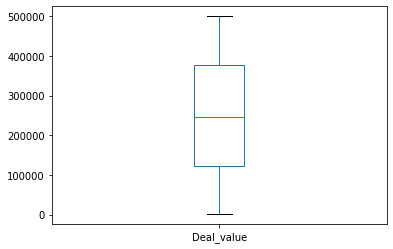

In [32]:
df['Deal_value'].plot.box()

<AxesSubplot:>

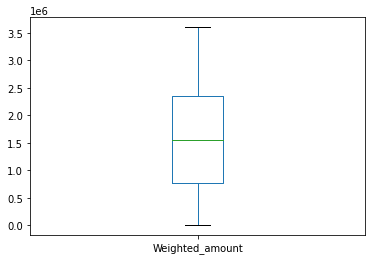

In [33]:
df['Weighted_amount'].plot.box()

In [34]:
## Handling Missing Numerical value
df['Deal_value']=df['Deal_value'].fillna(df['Deal_value'].mean())
df['Weighted_amount']=df['Weighted_amount'].fillna(df['Weighted_amount'].mean())

In [35]:
#df['Last_lead_update']=df['Last_lead_update'].apply(lambda x:None if x=='?' else x)

In [ ]:
plt.figure(figsize=(30,20))
plt.subplot(6,1,1)
sns.countplot(df['Last_lead_update'])

plt.subplot(6,1,2)
sns.countplot(df['Industry'])

plt.subplot(6,1,3)
sns.countplot(df['Location'])

plt.subplot(6,1,4)
sns.countplot(df['Geography'])

plt.subplot(6,1,5)
sns.countplot(df['POC_name'])

plt.subplot(6,1,6)
sns.countplot(df['Resource'])


In [36]:
#Handling Missing Categorical columns
df['Last_lead_update']=df['Last_lead_update'].apply(lambda x:'Missing' if x=='?' else x)
df['Last_lead_update']=df['Last_lead_update'].fillna(df['Last_lead_update'].mode()[0])   # Need to tune it

df['Industry']=df['Industry'].fillna(df['Industry'].mode()[0])

df['Location']=df['Location'].fillna(df['Location'].mode()[0])

df['Geography']=df['Geography'].fillna(df['Geography'].mode()[0])

df['POC_name']=df['POC_name'].fillna(df['POC_name'].mode()[0])

df['Resource']=df['Resource'].fillna(df['Resource'].mode()[0])

In [ ]:
plt.figure(figsize=(30,20))
plt.subplot(6,1,1)
sns.countplot(df['Last_lead_update'])

plt.subplot(6,1,2)
sns.countplot(df['Industry'])

plt.subplot(6,1,3)
sns.countplot(df['Location'])

plt.subplot(6,1,4)
sns.countplot(df['Geography'])

plt.subplot(6,1,5)
sns.countplot(df['POC_name'])

plt.subplot(6,1,6)
sns.countplot(df['Resource'])


<AxesSubplot:ylabel='Density'>

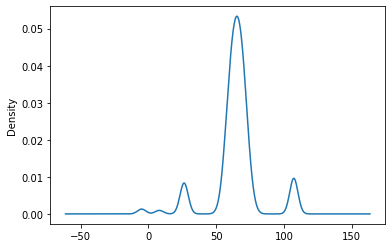

In [37]:
df['Success_probability'].plot.kde()

In [38]:
#df=df[df['Success_probability']>=0]

In [39]:
int(181/10)

18

In [40]:
df['Success_probability']=df['Success_probability'].apply(lambda x:int(x/10) if x>100 else x)
df['Success_probability']=df['Success_probability'].apply(lambda x:0 if x<0 else x)

<AxesSubplot:ylabel='Density'>

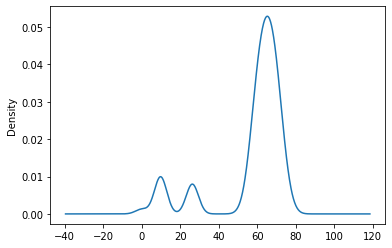

In [41]:
df['Success_probability'].plot.kde()

#### There is no Missing value in the Data

In [42]:
## For the time being- I am removing date columns from the dataset. I will consider while improving the model
df=df.drop(['Date_of_creation'],axis=1)  #Extracted Month from it

In [43]:
df_final, Encoders=pu.Cat2Num(df)

['Geography', 'Resource', 'Lead_source', 'Fund_category', 'Pitch']


In [44]:
df_final.head()

,year,Deal_value,Internal_rating,Success_probability,week,month,Weighted_amount,Geography_India,Geography_USA,Resource_Cannot deliver,Resource_Deliverable,Resource_No,Resource_Not enough,Resource_We have all the requirements,Resource_Yes,Lead_source_Contact Email,Lead_source_Marketing Event,Lead_source_Others,Lead_source_Website,Fund_category_Category 1,Fund_category_Category 2,Fund_category_Category 3,Fund_category_Category 4,Pitch_Product_1,Pitch_Product_2,Lead_revenue,Designation,Hiring_candidate_role,Level_of_meeting,Industry,Lead_name,Last_lead_update,Internal_POC,POC_name,Location
0,2020,320506.0,3,73.6,13,3,2.067263e+06,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,7,126,2,119,1386,7,12,568,292
1,2019,39488.0,5,58.9,28,7,2.408760e+05,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2,4,501,0,31,411,2,5,4528,457
2,2019,359392.0,4,68.8,30,7,2.407926e+06,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,8,286,0,56,940,4,18,272,15
3,2021,76774.0,1,64.5,4,1,4.683210e+05,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,2,611,1,114,1943,2,5,1170,372
4,2019,483896.0,4,62.4,21,5,1.569883e+06,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,7,369,1,46,3477,9,53,3962,505


In [45]:
Encoders

{'L_enc_Lead_revenue': LabelEncoder(),
 'L_enc_Designation': LabelEncoder(),
 'L_enc_Hiring_candidate_role': LabelEncoder(),
 'L_enc_Level_of_meeting': LabelEncoder(),
 'L_enc_Industry': LabelEncoder(),
 'L_enc_Lead_name': LabelEncoder(),
 'L_enc_Last_lead_update': LabelEncoder(),
 'L_enc_Internal_POC': LabelEncoder(),
 'L_enc_POC_name': LabelEncoder(),
 'L_enc_Location': LabelEncoder(),
 'OH_enc_': OneHotEncoder(handle_unknown='ignore', sparse=False)}

## Distribution of data

In [ ]:
fig = plt.figure(figsize=(12,36))
for i in range(len(df_final.columns)):
    fig.add_subplot(16,4,i+1)
    sns.distplot(df_final.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(df_final.columns[i])
plt.tight_layout()
plt.show()

## Univariate Analysis

In [ ]:
# Univariate Analysis: Box plots

fig = plt.figure(figsize=(12,36))
for i in range(len(df_final.columns)):
    fig.add_subplot(16,4,i+1)
    sns.boxplot(y=df_final.iloc[:,i])

## Bivariate Analysis: Bar plots (it will take time)

In [ ]:
# Bivariate Analysis: Bar plots

fig = plt.figure(figsize=(12,36))
for i in range(len(df_final.columns)):
    fig.add_subplot(16,4,i+1)
    sns.barplot(x=df_final.iloc[:,i],y=df_final['Success_probability'])

plt.tight_layout()
plt.show()

## Correlation Analysis

In [ ]:
df_corr = df_final.corr()
index = df_corr.index

In [ ]:
plt.figure(figsize = (28,12))
sns.heatmap(df_final[index].corr(),annot = True,cmap = 'rainbow')

In [ ]:
plt.figure(figsize=(22,12))
plt.title('High Correlation')
sns.heatmap(df_corr > 0.8, annot=True, square=True)

In [ ]:
corr = df_corr.corr()
cdf = pd.DataFrame(pd.concat([abs(df_corr['Success_probability']),abs(corr['Success_probability'])],\
                             axis='columns'))
cdf.columns = ['corr(x)','corr(corr(x))']
cdf.sort_values(by='corr(x)',axis=0,ascending=False)

In [46]:
df_final.to_csv('Train_Preprocessed.csv',index=False)

In [47]:
import pickle

In [48]:
pickle.dump(Encoders, open('Encoders.pkl', 'wb'))